<a href="https://colab.research.google.com/github/LucasDatilioCarderelli/Maratona_BehindTheCode_IBM20/blob/main/Desafio%206/DF6_Lit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 6 - LIT Paul

Desafio de classficação

## Importações

In [ ]:
!pip install tpot --upgrade

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

from tpot import TPOTClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("https://github.com/maratonadev-br/desafio-6-2020/blob/master/dataset/training_dataset.csv?raw=true")
test = pd.read_csv("https://raw.githubusercontent.com/maratonadev-br/desafio-6-2020/master/dataset/to_be_scored.csv")

df.shape, test.shape

((15857, 15), (1000, 14))

## Analise

In [ ]:
df.head(3)

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
0,915132186.0,Especialização,UNIP,Analista Senior,Eletrodomesticos,1.0,1.0,1.0,6.0,Google,28.0,5.0,4.0,0.0,perfil6
1,183037660.0,MBA,NaN,Supervisor,e-commerce,0.0,0.0,1.0,6.0,NaN,66.0,36.0,34.0,0.0,perfil2
2,681614019.0,Bacharelado,UNICAMP,Outros,e-commerce,1.0,1.0,1.0,10.0,Saint Paul,27.0,27.0,27.0,0.0,perfil2


In [ ]:
test.head(3)

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
0,648443203,Bacharelado,Unesp,Outros,Borracha,0,0,1,3,Saint Paul,58,3,2,0
1,423266690,Especialização,UNICAMP,SEM EXPERIÊNCIA,Eletrodomesticos,1,1,1,7,Mídia (revista/jornal/web),62,19,17,0
2,315097368,Bacharelado,UNICAMP,Engenheiro,Oleo e Gas,0,0,1,9,Google,36,3,1,0


In [ ]:
df.categoria.value_counts()

perfil6    4539
perfil2    4215
perfil1    2472
perfil5    1917
perfil4    1661
perfil3    1053
Name: categoria, dtype: int64

In [ ]:
df.describe()

,id,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados
count,1.394500e+04,13989.000000,14003.000000,13918.0,13959.000000,13987.000000,14044.000000,13924.000000,13979.000000
mean,5.544775e+08,0.497105,0.495965,1.0,6.016548,78.637735,37.153375,30.661017,0.358323
std,2.602859e+08,0.500009,0.500002,0.0,2.592178,106.539567,59.344535,51.979119,1.212509
min,1.000340e+08,0.000000,0.000000,1.0,2.000000,1.000000,1.000000,1.000000,0.000000
25%,3.283140e+08,0.000000,0.000000,1.0,4.000000,27.000000,7.000000,4.000000,0.000000
50%,5.576492e+08,0.000000,0.000000,1.0,6.000000,40.000000,18.000000,13.000000,0.000000
75%,7.805295e+08,1.000000,1.000000,1.0,8.000000,96.000000,43.000000,35.000000,0.000000
max,9.999894e+08,1.000000,1.000000,1.0,10.000000,2073.000000,1370.000000,1359.000000,32.000000


In [ ]:
df.isna().sum()

id                            1912
graduacao                     1907
universidade                  1937
profissao                     1880
organizacao                   1896
pretende_fazer_cursos_lit     1868
interesse_mba_lit             1854
importante_ter_certificado    1939
horas_semanais_estudo         1898
como_conheceu_lit             1942
total_modulos                 1870
modulos_iniciados             1813
modulos_finalizados           1933
certificados                  1878
categoria                        0
dtype: int64

In [ ]:
test.isna().sum()

id                            0
graduacao                     0
universidade                  0
profissao                     0
organizacao                   0
pretende_fazer_cursos_lit     0
interesse_mba_lit             0
importante_ter_certificado    0
horas_semanais_estudo         0
como_conheceu_lit             0
total_modulos                 0
modulos_iniciados             0
modulos_finalizados           0
certificados                  0
dtype: int64

In [ ]:
df.nunique()

id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578
modulos_iniciados               372
modulos_finalizados             339
certificados                     23
categoria                         6
dtype: int64

In [ ]:
df.importante_ter_certificado.value_counts()

1.0    13918
Name: importante_ter_certificado, dtype: int64

In [ ]:
df.corr()

,id,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados
id,1.000000,0.008512,0.013496,NaN,-0.002533,-0.006585,-0.009891,-0.012741,0.007366
pretende_fazer_cursos_lit,0.008512,1.000000,1.000000,NaN,0.000160,0.015072,0.013698,0.008942,0.004853
interesse_mba_lit,0.013496,1.000000,1.000000,NaN,0.000273,0.010645,0.013059,0.007669,0.011617
importante_ter_certificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
horas_semanais_estudo,-0.002533,0.000160,0.000273,NaN,1.000000,-0.014426,-0.015174,-0.016198,-0.003723
total_modulos,-0.006585,0.015072,0.010645,NaN,-0.014426,1.000000,0.850781,0.772927,0.361118
modulos_iniciados,-0.009891,0.013698,0.013059,NaN,-0.015174,0.850781,1.000000,0.977808,0.557129
modulos_finalizados,-0.012741,0.008942,0.007669,NaN,-0.016198,0.772927,0.977808,1.000000,0.601158
certificados,0.007366,0.004853,0.011617,NaN,-0.003723,0.361118,0.557129,0.601158,1.000000


In [ ]:
df.select_dtypes(include=object).head(3)

,graduacao,universidade,profissao,organizacao,como_conheceu_lit,categoria
0,Especialização,UNIP,Analista Senior,Eletrodomesticos,Google,perfil6
1,MBA,NaN,Supervisor,e-commerce,NaN,perfil2
2,Bacharelado,UNICAMP,Outros,e-commerce,Saint Paul,perfil2


In [ ]:
df.universidade.value_counts()

INSPER INSTITUTO DE ENSINO E PESQUISA    696
UFPE                                     696
UEPB                                     694
UNIP                                     690
Unesp                                    684
Escola Paulista de Direito               677
UFRN                                     673
UFRJ                                     673
FACULDADE ANHANGUERA                     672
UNIVERSIDADE CRUZEIRO DO SUL             670
Universidade Metodista de Sao Paulo      669
USP                                      662
UNICAMP                                  660
UNIVERSIDADE PRESBITERIANA MACKENZIE     656
UFSCar                                   654
UNIVERSIDADE ESTADUAL DE PONTA GROSSA    654
FGV-RJ                                   651
UNIVERSIDADE NOVE DE JULHO               632
UFF                                      631
FATEC                                    621
CENTRO UNIVERSITÁRIO ESTÁCIO DA SÁ       605
Name: universidade, dtype: int64

In [ ]:
df.graduacao.value_counts()

Licenciatura      2398
Bacharelado       2329
Especialização    2321
MBA               2311
Tecnólogo         2296
SEM FORMAÇÃO      2295
Name: graduacao, dtype: int64

## Pre processamento

### Drop

In [ ]:
colsToDrop = ["id", "importante_ter_certificado"
              #"profissao", "graduacao", "modulos_iniciados", 
              #"pretende_fazer_cursos_lit", "como_conheceu_lit",
              #"universidade", "organizacao"
              ]
for col in colsToDrop:
  try: df.drop(col, axis=1, inplace=True)
  except: print(f"{col} already droped")

id already droped
importante_ter_certificado already droped


### Fillna

In [ ]:
colsNumber = df.select_dtypes(include="number").columns

NameError: ignored

In [ ]:
df[colsNumber] = df[colsNumber].fillna(0)

In [ ]:
df["graduacao"].fillna("SEM FORMAÇÃO", inplace=True)
df["profissao"].fillna("SEM EXPERIÊNCIA", inplace=True)
df["como_conheceu_lit"].fillna("OUTROS", inplace=True)
df["organizacao"].fillna("Eletroeletronicos", inplace=True)
df["universidade"].fillna("FATEC", inplace=True)

### Bin

In [ ]:
# df.loc[df["certificados"] > 0, "certificados"] = 1
# df.certificados.value_counts()

In [ ]:
colsToBin = ['horas_semanais_estudo', 'total_modulos', 'modulos_finalizados', "modulos_iniciados"]

# est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# df[colsToBin] = est.fit_transform(df[colsToBin]).astype(int)

### Label Enconding

In [ ]:
colsToDummy = ['universidade', "organizacao", "como_conheceu_lit",
               'graduacao', 'profissao'] 
# df = pd.get_dummies(df, columns=colsToDummy)

In [ ]:
# df["categoria"].map(lambda x: x[-1])

In [ ]:
le = LabelEncoder()
df[colsToDummy] = df[colsToDummy].apply(lambda x: le.fit_transform(x)).astype(int)

---

In [ ]:
df

,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
0,1,13,2,1,1.0,1.0,6.0,1,28.0,5.0,4.0,0.0,perfil6
1,3,3,10,9,0.0,0.0,6.0,6,66.0,36.0,34.0,0.0,perfil2
2,0,12,8,9,1.0,1.0,10.0,8,27.0,27.0,27.0,0.0,perfil2
3,4,10,8,2,0.0,1.0,5.0,2,29.0,10.0,6.0,0.0,perfil5
4,5,5,9,1,0.0,0.0,7.0,1,67.0,49.0,44.0,0.0,perfil2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15852,0,7,8,0,0.0,0.0,8.0,6,10.0,0.0,0.0,0.0,perfil6
15853,0,3,0,2,0.0,0.0,7.0,3,42.0,17.0,15.0,0.0,perfil5
15854,5,13,11,2,0.0,0.0,7.0,7,30.0,9.0,8.0,0.0,perfil5
15855,4,16,0,4,0.0,0.0,10.0,6,226.0,102.0,93.0,1.0,perfil1


## Train

In [ ]:
X = df[["certificados", "modulos_finalizados", "modulos_iniciados", "total_modulos"]]
# X = df.drop("categoria", axis=1)
y = df["categoria"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=.7, random_state=0)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((11099, 4), (4758, 4), (11099,), (4758,))

## Modelando

In [ ]:
from xgboost import XGBClassifier
mdl = XGBClassifier()
mdl.fit(Xtrain, ytrain)
p = mdl.predict(Xtest)
print(f1_score(ytest, p, average="macro"))
print(classification_report(ytest, p, digits=4))

0.7876517208372954
              precision    recall  f1-score   support

     perfil1     0.8200    0.7198    0.7666       753
     perfil2     0.7837    0.8439    0.8127      1262
     perfil3     0.7755    0.7451    0.7600       306
     perfil4     0.7601    0.7663    0.7632       492
     perfil5     0.8124    0.7750    0.7933       609
     perfil6     0.8208    0.8398    0.8302      1336

    accuracy                         0.7999      4758
   macro avg     0.7954    0.7817    0.7877      4758
weighted avg     0.8005    0.7999    0.7993      4758



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(Xtrain, ytrain)
GBC_p = GBC.predict(Xtest)
print(f1_score(ytest, GBC_p, average="macro"))

0.7867238405258293


In [ ]:
tp = TPOTClassifier(random_state=0, verbosity=2, scoring="f1_macro",
                    config_dict="TPOT light")
tp.fit(Xtrain, ytrain)
tp.export("pipeline4")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(bootstrap=True, criterion="entropy", 
                             max_features=0.9, min_samples_leaf=4, 
                             min_samples_split=2, n_estimators=100)
RFC.fit(Xtrain, ytrain)
p = RFC.predict(Xtest)
print(classification_report(ytest, p, digits=4))

              precision    recall  f1-score   support

     perfil1     0.8175    0.7198    0.7655       753
     perfil2     0.7845    0.8479    0.8149      1262
     perfil3     0.7736    0.7484    0.7608       306
     perfil4     0.7584    0.7785    0.7683       492
     perfil5     0.8092    0.7800    0.7943       609
     perfil6     0.8317    0.8361    0.8339      1336

    accuracy                         0.8020      4758
   macro avg     0.7958    0.7851    0.7896      4758
weighted avg     0.8027    0.8020    0.8015      4758



In [ ]:
from sklearn.pipeline import make_pipeline
from tpot.export_utils import set_param_recursive
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Average CV score on the training set was: 0.8019035713252997
exported_pipeline = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(criterion="gini", max_depth=7, min_samples_leaf=6, min_samples_split=8)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 0)

exported_pipeline.fit(Xtrain, ytrain)
results = exported_pipeline.predict(Xtest)
print(classification_report(ytest, results, digits=4))

              precision    recall  f1-score   support

     perfil1     0.8163    0.7198    0.7650       753
     perfil2     0.7854    0.8439    0.8136      1262
     perfil3     0.7763    0.7484    0.7621       306
     perfil4     0.7550    0.7703    0.7626       492
     perfil5     0.8048    0.7783    0.7913       609
     perfil6     0.8240    0.8338    0.8289      1336

    accuracy                         0.7993      4758
   macro avg     0.7936    0.7824    0.7872      4758
weighted avg     0.7999    0.7993    0.7988      4758



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from tpot.builtins import ZeroCount
from tpot.export_utils import set_param_recursive

# Average CV score on the training set was: 0.8005146399954957
exported_pipeline = make_pipeline(
    ZeroCount(),
    DecisionTreeClassifier(criterion="gini", max_depth=8, min_samples_leaf=7, min_samples_split=14)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 0)

exported_pipeline.fit(Xtrain, ytrain)
results = exported_pipeline.predict(Xtest)
print(classification_report(ytest, results, digits=4))

              precision    recall  f1-score   support

     perfil1     0.8029    0.7251    0.7620       753
     perfil2     0.7934    0.8368    0.8145      1262
     perfil3     0.7664    0.7614    0.7639       306
     perfil4     0.7393    0.7724    0.7555       492
     perfil5     0.8058    0.7701    0.7876       609
     perfil6     0.8211    0.8278    0.8245      1336

    accuracy                         0.7966      4758
   macro avg     0.7882    0.7823    0.7847      4758
weighted avg     0.7969    0.7966    0.7962      4758



In [ ]:
from sklearn.feature_selection import SelectFwe, VarianceThreshold, f_classif
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from tpot.export_utils import set_param_recursive

# Average CV score on the training set was: 0.804739694746322
exported_pipeline = make_pipeline(
    VarianceThreshold(threshold=0.2),
    SelectFwe(score_func=f_classif, alpha=0.006),
    XGBClassifier(learning_rate=0.1, max_depth=6, min_child_weight=10, 
                  n_estimators=100, nthread=1, subsample=0.95)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 0)

exported_pipeline.fit(Xtrain, ytrain)
results = exported_pipeline.predict(Xtest)
print(classification_report(ytest, results, digits=4))

              precision    recall  f1-score   support

     perfil1     0.8135    0.7185    0.7630       753
     perfil2     0.7841    0.8431    0.8125      1262
     perfil3     0.7782    0.7451    0.7613       306
     perfil4     0.7560    0.7683    0.7621       492
     perfil5     0.8068    0.7816    0.7940       609
     perfil6     0.8263    0.8368    0.8315      1336

    accuracy                         0.7997      4758
   macro avg     0.7941    0.7822    0.7874      4758
weighted avg     0.8002    0.7997    0.7991      4758



## Feature Seletion

In [ ]:
DTC = DecisionTreeClassifier()
DTC.fit(Xtrain,ytrain)
DTC_p = DTC.predict(Xtest)
print(classification_report(ytest, DTC_p))

for n in range(0, len(DTC.feature_importances_)):
  print(f"{X.columns[n]:<51} {DTC.feature_importances_[n]}")

              precision    recall  f1-score   support

     perfil1       0.63      0.62      0.62       753
     perfil2       0.71      0.71      0.71      1262
     perfil3       0.64      0.62      0.63       306
     perfil4       0.66      0.63      0.64       492
     perfil5       0.71      0.71      0.71       609
     perfil6       0.75      0.78      0.76      1336

    accuracy                           0.70      4758
   macro avg       0.68      0.68      0.68      4758
weighted avg       0.70      0.70      0.70      4758



In [ ]:
k_vs_score = []

for k in range(2,13,2):
  selector = SelectKBest(score_func=f_classif, k=k)

  Xtrain2 = selector.fit_transform(Xtrain, ytrain)
  Xval2 = selector.transform(Xtest)

  mdl2 = make_pipeline(
    VarianceThreshold(threshold=0.2),
    SelectFwe(score_func=f_classif, alpha=0.006),
    XGBClassifier(learning_rate=0.1, max_depth=6, min_child_weight=10, 
                  n_estimators=100, nthread=1, subsample=0.95))
  mdl2.fit(Xtrain2, ytrain)

  p2 = mdl2.predict(Xval2)

  score = f1_score(ytest, p2, average="micro")
  print("k = {} - f1 = {}".format(k, score))

  k_vs_score.append(score)

k = 2 - f1 = 0.7635561160151324
k = 4 - f1 = 0.7997057587221522
k = 6 - f1 = 0.7997057587221522
k = 8 - f1 = 0.7997057587221522
k = 10 - f1 = 0.7997057587221522
k = 12 - f1 = 0.7997057587221522


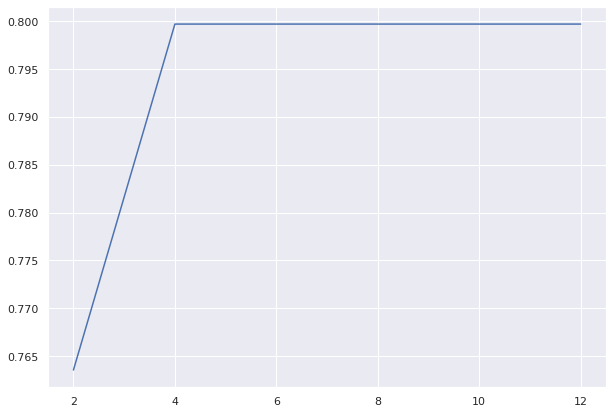

In [ ]:
pd.Series(k_vs_score, index=range(2,13,2)).plot(figsize=(10,7));

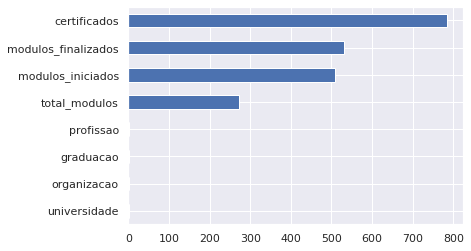

In [ ]:
selector = SelectKBest(score_func=f_classif, k=8)
selector.fit(Xtrain, ytrain)

mask = selector.get_support()
Xtest.columns[mask]

pd.Series(selector.scores_, index=Xtrain.columns).sort_values().tail(8).plot.barh();

## Submission

In [ ]:
test

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
0,648443203,Bacharelado,Unesp,Outros,Borracha,0,0,1,3,Saint Paul,58,3,2,0
1,423266690,Especialização,UNICAMP,SEM EXPERIÊNCIA,Eletrodomesticos,1,1,1,7,Mídia (revista/jornal/web),62,19,17,0
2,315097368,Bacharelado,UNICAMP,Engenheiro,Oleo e Gas,0,0,1,9,Google,36,3,1,0
3,911835279,Licenciatura,UNICAMP,Outros,Estado,1,1,1,9,Google,145,61,54,1
4,755852400,Especialização,FACULDADE ANHANGUERA,Engenheiro,Entretenimento,0,0,1,8,Minha empresa - benefício LITpass,33,33,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0


In [ ]:
exported_pipeline = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(criterion="gini", max_depth=7, min_samples_leaf=6, min_samples_split=8))
set_param_recursive(exported_pipeline.steps, 'random_state', 0)

exported_pipeline.fit(Xtrain, ytrain)
results = exported_pipeline.predict(Xtest)

In [ ]:
X2 = test[["certificados", "modulos_finalizados", "modulos_iniciados", "total_modulos"]]

In [ ]:
test_predict = exported_pipeline.predict(X2)

In [ ]:
test_results = pd.DataFrame({"target":test_predict})
#test_results = pd.concat([test, test_results], axis=1)

In [ ]:
test_results.to_csv("results", index=False)

# GC

In [ ]:
import gc
gc.collect()

4212